In [1]:
# ./manage.py shell_plus --notebook

import os, sys
PWD = os.getenv('PWD')
os.chdir(PWD)
sys.path.insert(0, os.getenv('PWD'))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings.py")
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
import django
django.setup()

In [40]:
import batman
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [203]:
def get_params(per, rp, inc, a):
    params = batman.TransitParams()
    params.t0 = 0.
    params.per = per
    params.rp = rp
    params.a = a
    params.inc = inc
    params.ecc = 0.
    params.w = 90.
    params.u = [.4]
    params.limb_dark = "linear"
    return params

In [265]:
planets = ["Earth", "Jupiter", "Neptune"]
pers = np.array([365.25, 4332.8201, 60190.03])
rps = np.array([0.009168, 0.1028, 0.0354])
ass = np.array([215, 1119, 6466,])

incs_s = []
for rp, a in zip(rps, ass):
    inc_min = np.arccos(1/a)/2/np.pi * 360
    #incs = np.linspace(inc_min + (90 - inc_min)*0.0, 90, 3)
    incs = [inc_min, inc_min + (90 - inc_min)*.2, 90]
    incs_s.append(incs)
print(incs_s)

[[89.73350704140447, 89.78680563312358, 90], [89.94879733052785, 89.95903786442229, 90], [89.99113891436104, 89.99291113148884, 90]]


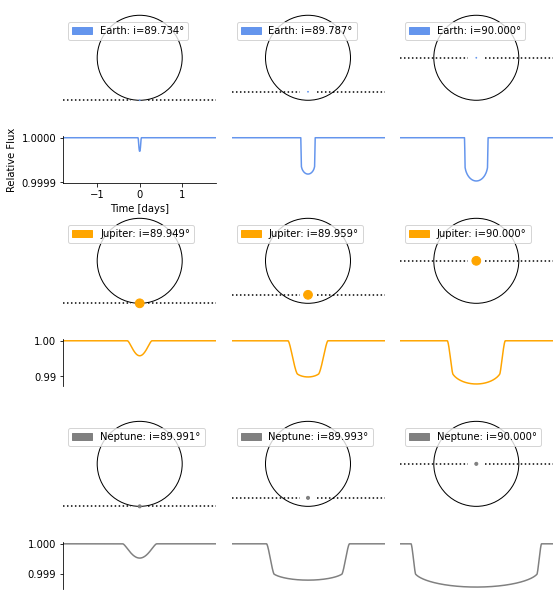

In [326]:
%matplotlib inline
fig, axs = plt.subplots(6, 3, figsize=(8,9),
                        gridspec_kw={
                            'height_ratios': [1.,.3,1.,.3,1.,.3,],
                            "hspace":0
                        },
                       #constrained_layout=True
                       )

width = 1.8
height = .011
ts = np.linspace(-width, width, 500)
cols=['cornflowerblue', 'orange', 'gray']

# plot transits
plot_width = 1.2
for i_planet, (planet, per, rp, a) in enumerate(zip(planets, pers, rps, ass)):
    for i_inc, inc in enumerate(incs_s[i_planet]):
        ax = axs[i_planet*2, i_inc]
        ax.axis("off")
        ax.set_xlim((-plot_width*1.5, plot_width*1.5))
        ax.set_ylim((-plot_width,plot_width))
        ax.set_aspect('equal', adjustable='box')
        # sun
        circ = patches.Circle((0, 0), radius=1, fill=False)
        ax.add_patch(circ)
        
        # orbit
        b = a * np.cos(inc/360 * 2*np.pi)
        ax.plot([-plot_width*1.5, -.2], [-b, -b],
                linestyle='dotted',
                color='black')
        ax.plot([.2, plot_width*1.5], [-b, -b],
                linestyle='dotted',
                color='black')
        
        # planet
        circ = patches.Circle((0, -b), radius=rp, color=cols[i_planet], label=f"{planet}: i={inc:.3f}°",)
        ax.add_patch(circ)
        
        ax.legend(loc='upper left', bbox_to_anchor=(0,.9))
        

# plot light curves
scale_time = 1
for i_planet, (planet, per, rp, a) in enumerate(zip(planets, pers, rps, ass)):
    for i_inc, inc in enumerate(incs_s[i_planet]):
        params = get_params(per, rp, inc, a)
        model = batman.TransitModel(params, ts)
        flux = model.light_curve(params)
        flux /= flux.max()
        
        ax = axs[i_planet*2 + 1, i_inc]
        
        ax.plot(ts*scale_time, flux, cols[i_planet])
        ax.get_xaxis().set_visible(False)
        #ax.set_ylim((1 - rp**2 - rp**2, 1 + rp**2/10))
        ax.set_ylim((1 - rp**2 * 1.2 , 1 + rp**2 * .05))
        ax.set_xlim((-width*scale_time, width*scale_time))
        
        if i_inc == 0:
            ax.get_yaxis().get_major_formatter().set_useOffset(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
        else: 
            ax.axis("off")
            pass
        

# turn on time axis on first plot
axs[1,0].spines['bottom'].set_visible(True)
axs[1,0].get_xaxis().set_visible(True)
axs[1,0].set_xlabel('Time [days]')
axs[1,0].set_ylabel('Relative Flux')

plt.subplots_adjust(
    left=0.12,
    bottom=0.03,      
    right=0.97, 
    top=0.97, 
    hspace = .0,
    wspace =.1
)

#plt.tight_layout()
#plt.subplot_tool()
plt.savefig("thesis-files/batman_transits.pdf")

plt.show()


In [325]:
print(
    f"Transits simulated with the batman \footnote package. "
    f"Time axis scaling is the same for all sub-plots. "
    f"Paramaters: t0=0, ecc=, w=0, limb_dark='linear', u=[0.4] \n"
    f"Planet parameters: ", end=''
)
print(''.join([f"{planet}: per={per}, rp={rp}, a={a}, " for planet, per, rp, a in zip(planets, pers, rps, ass) ]))

Transits simulated with the batman ootnote package. Time axis scaling is the same for all sub-plots. Paramaters: t0=0, ecc=, w=0, limb_dark='linear', u=[0.4] 
Planet parameters: Earth: per=365.25, rp=0.009168, a=215, Jupiter: per=4332.8201, rp=0.1028, a=1119, Neptune: per=60190.03, rp=0.0354, a=6466, 
